# My first deep learning model

We will use the preload data set from keras with several images of different handwritten digits in order to build a neural net model to identify them

In [1]:
#Preparation of the model environment

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
#Loading the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

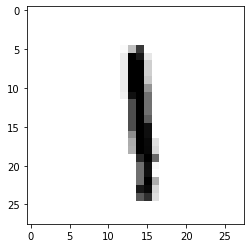

In [3]:
#let's have a look in data
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [4]:
#In this example it is clear that this graph corresponds to 1, as we can check in its label
print(y_train[8])

1


In [5]:
#The feature tensor has three dimensions
print(x_train.ndim)

3


In [6]:
#let's check their shape
print(x_train.shape)

(60000, 28, 28)


In [7]:
#Also let's check its data type
print(x_train.dtype)

uint8


In [0]:
#As summary, we have a image collection of 60000 train images of 28x28 pixels each one in a grey scale (int8 --> 256)

In [0]:
#Preparing the data

In [0]:
#First, we are going to transform data type from integer to float in order to normalize after that to get all values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [11]:
#Now we are going to change the different images to concat all their lines to transform them to a single line
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
#If we have a look in labels, they are values between 0 and 9 but we would need to change them to categorical values (one hot encoding)
print(y_test[0])
print(y_test[5])
print(y_train[0])
print(y_train[5])

7
1
5
2


In [13]:
#Let's use keras method "to_categorical"
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_test[0])
print(y_test[5])
print(y_train[0])
print(y_train[5])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
#Let's check their dimensions now
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
#Defining the model

In [0]:
#Our model will be sequential with 2 dense lays, first one with a sigmoid function as activator and the other one with a softflex function
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [17]:
#Let's check our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Configuring the model

In [0]:
#We are going to use as loss function the categorical cross entropy one, as optimizer sgd, and to check our result "accuracy" metrics

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [20]:
#Training the model
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 1.9065 - accuracy: 0.5065
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 1.3095 - accuracy: 0.7333
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.9788 - accuracy: 0.7989
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.7947 - accuracy: 0.8305
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.6804 - accuracy: 0.8504


In [0]:
#Evaluating the model

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.6257 - accuracy: 0.8600


In [24]:
#Let's check the final accuracy ans loss
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.86
Test loss: 0.6257059861183166


In [0]:
#Let's have a look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observation')
    plt.xlabel('Prediction')

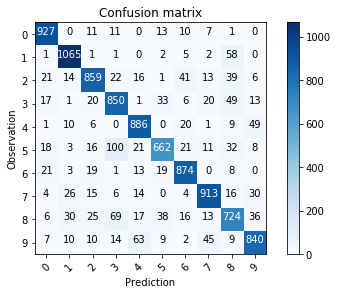

In [26]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [0]:
#Let's make predictions

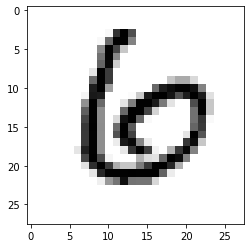

In [28]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [0]:
predictions = model.predict(x_test)

In [32]:
#result is a list of probabilities
print(predictions[11])

[0.05863352 0.06649952 0.32214484 0.03567293 0.03773531 0.02779058
 0.3343456  0.01702048 0.08470459 0.01545266]


In [33]:
#Where we are looking for the max probability category
np.argmax(predictions[11])

6

In [34]:
#And, of course, the sumatory of all of them must sum 1.0
np.sum(predictions[11])

1.0